In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import yfinance as yf 
import statsmodels.api as sm
import statsmodels as sms

%matplotlib inline

In [2]:
spy = yf.download('SPY', "2021-01-01", "2021-06-29")
spy_date = spy.index
spy

# Data is Homoscedasticity therefore we can conclude that running a linear regression model would make sense 

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,375.309998,375.450012,364.820007,368.790009,367.586090,110210800
2021-01-05,368.100006,372.500000,368.049988,371.329987,370.117767,66426200
2021-01-06,369.709991,376.980011,369.119995,373.549988,372.330505,107997700
2021-01-07,376.100006,379.899994,375.910004,379.100006,377.862427,68766800
2021-01-08,380.589996,381.489990,377.100006,381.260010,380.015381,71677200
...,...,...,...,...,...,...
2021-06-22,420.850006,424.000000,420.079987,423.109985,423.109985,57700300
2021-06-23,423.190002,424.049988,422.510010,422.600006,422.600006,49445400
2021-06-24,424.890015,425.549988,424.619995,425.100006,425.100006,45110300


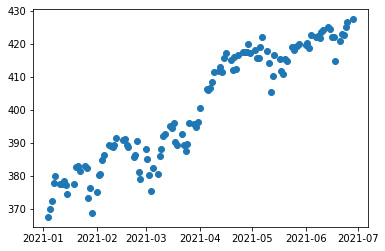

In [3]:
plt.scatter(spy_date, spy['Adj Close'])

In [4]:
# The data in the df column must be reshaped into an array with shape (num_samples, num_features)
x = spy['Adj Close'].to_frame()
print(f"X has {spy.shape[0]} rows and {spy.shape[1]} column of data.")
x.head()

X has 122 rows and 6 column of data.


,Adj Close
Date,
2021-01-04,367.586090
2021-01-05,370.117767
2021-01-06,372.330505
2021-01-07,377.862427
2021-01-08,380.015381


In [5]:
x['Week_of_Year'] = spy.index.weekofyear

x.head()

C:\Users\Luke\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


,Adj Close,Week_of_Year
Date,,
2021-01-04,367.586090,1
2021-01-05,370.117767,1
2021-01-06,372.330505,1
2021-01-07,377.862427,1
2021-01-08,380.015381,1


In [6]:
x_binary_encoded = pd.get_dummies(x, columns = ['Week_of_Year'])
x_binary_encoded.tail()

,Adj Close,Week_of_Year_1,Week_of_Year_2,Week_of_Year_3,Week_of_Year_4,Week_of_Year_5,Week_of_Year_6,Week_of_Year_7,Week_of_Year_8,Week_of_Year_9,...,Week_of_Year_17,Week_of_Year_18,Week_of_Year_19,Week_of_Year_20,Week_of_Year_21,Week_of_Year_22,Week_of_Year_23,Week_of_Year_24,Week_of_Year_25,Week_of_Year_26
Date,,,,,,,,,,,,,,,,,,,,,
2021-06-22,423.109985,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2021-06-23,422.600006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2021-06-24,425.100006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2021-06-25,426.609985,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2021-06-28,427.470001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
y = x['Adj Close'].copy()

x_binary_encoded = x_binary_encoded.drop('Adj Close', axis = 1)
x_binary_encoded.head()

,Week_of_Year_1,Week_of_Year_2,Week_of_Year_3,Week_of_Year_4,Week_of_Year_5,Week_of_Year_6,Week_of_Year_7,Week_of_Year_8,Week_of_Year_9,Week_of_Year_10,...,Week_of_Year_17,Week_of_Year_18,Week_of_Year_19,Week_of_Year_20,Week_of_Year_21,Week_of_Year_22,Week_of_Year_23,Week_of_Year_24,Week_of_Year_25,Week_of_Year_26
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-01-05,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-01-06,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-01-07,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-01-08,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_binary_encoded, y)
predictions = model.predict(x_binary_encoded)

In [9]:
from sklearn.metrics import mean_squared_error, r2_score 

score = model.score(x_binary_encoded, y)

r2 = r2_score(y, predictions)

print(f"Score: {score}, r2: {r2}")

# Low r2 score meaning that the model has a low correlation between the independent variable and dependent variable 

Score: 0.969656178318421, r2: 0.969656178318421


In [10]:
mse = mean_squared_error(y, predictions)
mse

9.302154653988106

In [11]:
rmse = np.sqrt(mse)
rmse

3.0499433853742444

In [12]:
np.std(y)

17.5088103683715

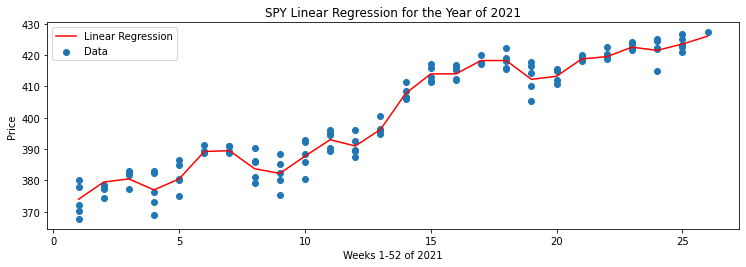

In [13]:
plt.figure(figsize=(12.4, 3.8))
plt.scatter(x['Week_of_Year'], y, label = 'Data')
plt.plot(x['Week_of_Year'], predictions, color = 'red', label = 'Linear Regression')
plt.title('SPY Linear Regression for the Year of 2021')
plt.xlabel('Weeks 1-52 of 2021')
plt.ylabel('Price')
plt.legend(loc='upper left')

In [14]:
print(f"R-squared (R2): {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Standard Deviation of Future Returns: {np.std(y)}")

R-squared (R2): 0.969656178318421
Mean Squared Error (MSE): 9.302154653988106
Root Mean Squared Error (RMSE): 3.0499433853742444
Standard Deviation of Future Returns: 17.5088103683715
